In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
import matplotlib.pyplot as plt
#-----------------
from tensorflow import keras
from tensorflow.keras import layers
#-----------------
import numpy as np
from PIL import Image 
#-----------------
import os

2024-06-09 02:50:19.989935: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 02:50:19.993604: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 02:50:20.050032: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 02:50:21.038430: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#===== Old Model =====================
# #--- create model --------------
# model = keras.Sequential([
# layers.Dense(512, activation="relu"),
# layers.Dense(10, activation="softmax")
# ])
# #----- compile model -----------
# model.compile(optimizer="rmsprop",
# loss="sparse_categorical_crossentropy",
# metrics=["accuracy"])
#-------------------------------
# #-----------------------------------------------
# # Восстановление состояния модели
# path = os.getcwd()
# model_file = path + '/my_model.keras'
# print("model_file_name=", model_file)
# model = keras.models.load_model(model_file)
# #-----------------------------------------------
# #model.summary()

#====================================

In [3]:
#===== New Model =====================
type(train_images)
print('dtype =', train_images.dtype)
print('ndim =', train_images.ndim)
print('shape =', train_images.shape)

#train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
#test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Создание свёрточной нейросети  ======= GPT =======
model = keras.Sequential([
    # Свёрточный слой
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # Слой пулинга
    layers.MaxPooling2D((2, 2)),
    # Свёрточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Слой пулинга
    layers.MaxPooling2D((2, 2)),
    # Свёрточный слой
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Преобразование данных из 2D в 1D
    layers.Flatten(),
    # Полносвязный слой
    layers.Dense(64, activation='relu'),
    # Выходной слой
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вывод информации о модели
model.summary()

dtype = uint8
ndim = 3
shape = (60000, 28, 28)


/home/andrey/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#===== New Model =====================
# # Восстановление состояния модели ================================= GPT 
path = os.getcwd()
model_file = path + '/my_model.keras'
if os.path.exists(model_file):
    model = keras.models.load_model(model_file)
else:
    print("The model file does not exist, training a new model.")
    #===== New Model =====================
    model.fit(train_images, train_labels, epochs=5, batch_size=128) 
    
# Вывод структуры модели
model.summary()
# Объяснение изменений:
# Изменение формы входных данных: Так как свёрточные слои ожидают входные данные 
# в формате (height, width, channels), 
# мы изменили форму обучающих и тестовых изображений 
# с (60000, 28, 28) на (60000, 28, 28, 1) и (10000, 28, 28, 1) соответственно.

The model file does not exist, training a new model.
Epoch 1/5


2024-06-09 02:50:33.158519: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.8272 - loss: 0.5424
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9811 - loss: 0.0617
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9883 - loss: 0.0382
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9915 - loss: 0.0267
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9930 - loss: 0.0213


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,646 (729.09 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,324 (364.55 KB)

In [5]:
#################################################################################
#################################################################################
#################################################################################
#=== Get Test Imgs Names and Valid Count ===
import folder_funcs
import numpy as np
import os           # temp 
path = os.getcwd()  # temp
print('path = ', path)
f_name_ok  = ['' for _ in range(folder_funcs.MAX_COUNT_TEST_IMGS)]

f_ok_count = folder_funcs.Test_Imgs_Get(path, f_name_ok)

#print(str(folder_funcs.MAX_COUNT_TEST_IMGS))
print("count right test_files = ", str(f_ok_count))
# print("1_file_name = ", f_name_ok[0])


path =  /home/andrey/projects/ai/ai_ftp_gpt
count right test_files =  9


In [6]:
#=== Get Test Imgs ===
test_file_folder_path = folder_funcs.Get_Input_Folder_Path()

test_imgs  = ['' for _ in range(f_ok_count)]
imgs  = np.zeros((f_ok_count,28,28))
for i in range(f_ok_count) :
    test_imgs[i] = np.asarray(Image.open(test_file_folder_path + f_name_ok[i]).convert('L'))
    imgs[i] = np.invert(test_imgs[i])
    imgs[i] = imgs[i].astype('float32') / 255

/Upload/
/Upload/plt.png


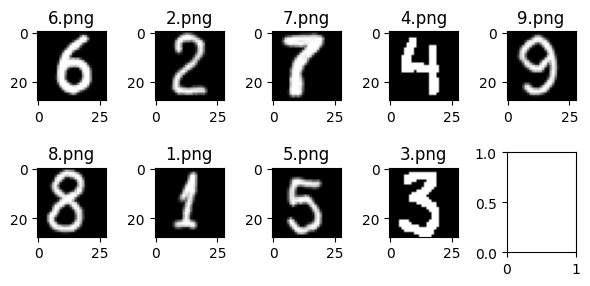

In [37]:
#=== plot Test Imgs ===

plt_w_count = 5
plt_h_count = 2
fig, axes = plt.subplots(plt_h_count, plt_w_count, figsize=(6, 3))
ax = axes.ravel()

if (f_ok_count > 10) :
    plot_count = 10
else :
    plot_count = f_ok_count
    
for i in range(plot_count) :    
    ax[i].imshow(imgs[i], cmap=plt.cm.gray)
    ax[i].set_title(str(f_name_ok[i]))

fig.tight_layout()
#plt.show()
#=== save plot Test Imgs ===
import folder_funcs
output_folder = folder_funcs.Get_Output_Folder_Path() 
print(output_folder)
output_plt_name = output_folder + 'plt.png'
print(output_plt_name)
fig.savefig(path + output_plt_name)
#fig.savefig('Upload/' + 'plt.png')

In [38]:
#===== Old Model =====================
# #=== Reshape ====
# print('imgs.dim =', imgs[0].ndim) 
# print('imgs.shape =', imgs[0].shape) 
# imgs = imgs.reshape((f_ok_count, folder_funcs.file_h * folder_funcs.file_w)) 
# print('test_imgs.dim =', imgs[0].ndim) 
# print('test_imgs.shape =', imgs.shape) 

In [39]:
predictions = model.predict(imgs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [40]:
#=== Save results to file ===
import folder_funcs
folder_funcs.write_table(predictions)

In [41]:
model.save(model_file)

In [42]:
!jupyter nbconvert --to script self_img_test.ipynb

[NbConvertApp] Converting notebook self_img_test.ipynb to script
[NbConvertApp] Writing 5397 bytes to self_img_test.py
